In [5]:
### import 
import os
from pprint import pprint
# import vasper
from pymatgen.io import lobster as pmglobster
from pymatgen.electronic_structure import cohp as pmgcohp

### files
# data_dir = os.path.join(os.path.dirname(os.path.dirname(automater.__file__)), 'data', 'lobster', 'GaAs')
# data_dir = os.path.join(os.path.dirname(os.path.dirname(vasper.__file__)), 'data', 'lobster', 'BaTiO3')
data_dir = "/home/mizo/vega/sample/Na2SiO3/n48"
charge_file = os.path.join(data_dir, 'CHARGE.lobster')
cohpcar_file = os.path.join(data_dir, 'COHPCAR.lobster')
coopcar_file = os.path.join(data_dir, 'COOPCAR.lobster')
doscar_file = os.path.join(data_dir, 'DOSCAR.lobster')
icohp_file = os.path.join(data_dir, 'ICOHPLIST.lobster')
icoop_file = os.path.join(data_dir, 'ICOOPLIST.lobster')
vasprun = os.path.join(data_dir, 'vasprun.xml')
posfile = os.path.join(data_dir, 'POSCAR')

/home/mizo/vega/sample/Na2SiO3/n48/POSCAR


In [9]:
### read files
charge = pmglobster.Charge(filename=charge_file)
cohpcar = pmglobster.Cohpcar(are_coops=False, filename=cohpcar_file)
coopcar = pmglobster.Cohpcar(are_coops=True, filename=coopcar_file)
doscar = pmglobster.Doscar(doscar=doscar_file, structure_file=posfile)
icohp = pmglobster.Icohplist(are_coops=False, filename=icohp_file)
icoop = pmglobster.Icohplist(are_coops=True, filename=icoop_file)

In [52]:
### Charge class
## get Structure class object with Mulliken and Loewdin charges as site properties
structure = charge.get_structure_with_charges(structure_filename=posfile)
print(structure.sites[0].properties)

{'Mulliken Charges': 0.82, 'Loewdin Charges': 0.75}


In [11]:
### Cohp class
# cohp = pmgcohp.Cohp(cohpcar.efermi, cohpcar.energies, cohpcar.cohp_data)
cohpcar.orb_res_cohp

In [12]:
icohp.is_spi

AttributeError: 'Icohplist' object has no attribute 'is_spi'

In [13]:
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.io.lobster import Cohpcar


#COHPCAR_path = "/home/inoue/vega/mizo_lobster/COHPCAR.lobster"
# COHPCAR_path = cohpcar_file
COHPCAR_path = "/home/mizokami-ubuntu/Vega/lobster"
cohpcar = Cohpcar(filename=COHPCAR_path)
cdata = cohpcar.cohp_data
cdata_processed = {}
del cdata['average']
cdata['total'] = cdata.pop('1')
c = cdata['total']
c["efermi"] = 0
c["energies"] = cohpcar.energies
c["are_coops"] = False
cp = CohpPlotter()
cp.add_cohp_dict(cdata_processed)
x = cp.get_plot()
x.ylim([-23, 15])
x.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/mizokami-ubuntu/Vega/lobster'

{'COHP': {<Spin.up: 1>: array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
       -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
       -0.0000e+00, -0.0000e+00, -0.0000e+00, -1.0000e-05, -2.0000e-05,
       -6.0000e-05, -1.6000e-04, -3.7000e-04, -7.4000e-04, -1.3300e-03,
       -2.1400e-03, -3.1000e-03, -4.0600e-03, -4.8600e-03, -5.3700e-03,
       -5.5600e-03, -5.4800e-03, -5.2500e-03, -4.9800e-03, -4.7500e-03,
       -4.5800e-03, -4.4700e-03, -4.4100e-03, -4.4000e-03, -4.4200e-03,
       -4.4500e-03, -4.4900e-03, -4.5300e-03, -4.6000e-03, -4.6600e-03,
       -4.7200e-03, -4.7600e-03, -4.7900e-03, -4.8400e-03, -4.8800e-03,
       -4.9000e-03, -4.8900e-03, -4.8700

(-23, 15)

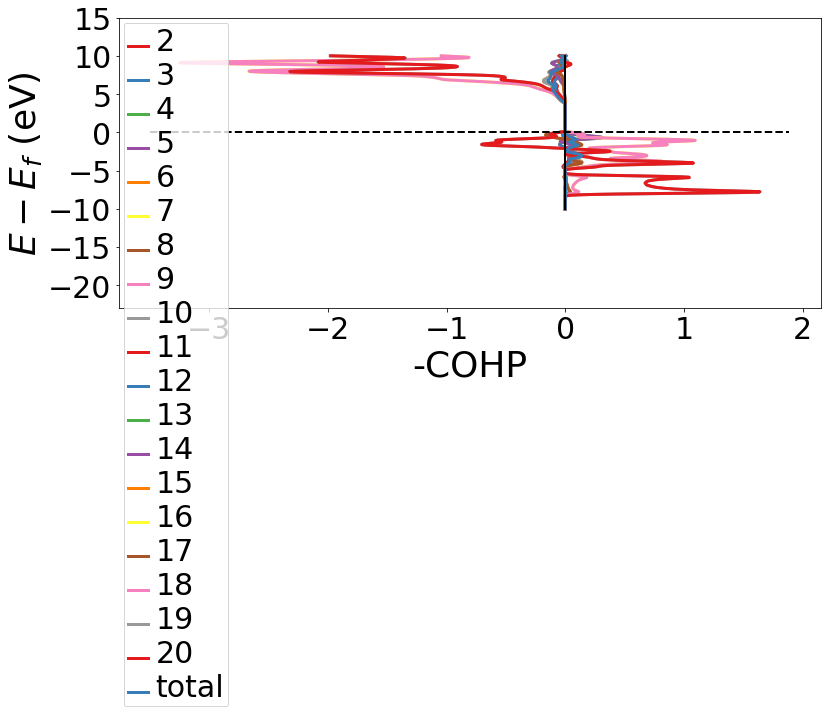

In [14]:
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.io.lobster import Cohpcar


#COHPCAR_path = "/home/inoue/vega/mizo_lobster/COHPCAR.lobster"
COHPCAR_path = cohpcar_file
cohpcar = Cohpcar(filename=COHPCAR_path)
cdata = cohpcar.cohp_data
cdata_processed = {}
del cdata['average']
cdata['total'] = cdata.pop('1')
for key in cdata:
    c = cdata[key]
    c["efermi"] = 0
    c["energies"] = cohpcar.energies
    c["are_coops"] = False
    cdata_processed[key] = Cohp.from_dict(c)
    pprint(c)
cp = CohpPlotter()
cp.add_cohp_dict(cdata_processed)
x = cp.get_plot()
x.ylim([-23, 15])
# x.show()

In [15]:
cohpcar.efermi

1.12338

In [16]:
cdata.keys()

dict_keys(['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', 'total'])

In [17]:
from pymatgen.electronic_structure.cohp import Cohp
from pymatgen.electronic_structure.plotter import CohpPlotter
from pymatgen.io.lobster import Cohpcar


#COHPCAR_path = "/home/inoue/vega/mizo_lobster/COHPCAR.lobster"
# COHPCAR_path = cohpcar_file
COHPCAR_path = "/home/mizokami-ubuntu/Vega/lobster/COHPCAR.lobster"
cohpcar = Cohpcar(filename=COHPCAR_path)
cdata = cohpcar.orb_res_cohp['1']
cdata_processed = {}
lst = ['5s-2s']
# for key in cdata:
for key in lst:
    c = cdata[key]
    c["efermi"] = 0
    c["energies"] = cohpcar.energies
    c["are_coops"] = False
    cdata_processed[key] = Cohp.from_dict(c)
cp = CohpPlotter()
cp.add_cohp_dict(cdata_processed)
x = cp.get_plot()
# x.ylim([-50, 20])
x.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/mizokami-ubuntu/Vega/lobster/COHPCAR.lobster'

In [18]:
cohpcar.energies

array([-10.02506,  -9.97494,  -9.92481,  -9.87469,  -9.82456,  -9.77444,
        -9.72431,  -9.67419,  -9.62406,  -9.57393,  -9.52381,  -9.47368,
        -9.42356,  -9.37343,  -9.32331,  -9.27318,  -9.22306,  -9.17293,
        -9.12281,  -9.07268,  -9.02256,  -8.97243,  -8.92231,  -8.87218,
        -8.82206,  -8.77193,  -8.7218 ,  -8.67168,  -8.62155,  -8.57143,
        -8.5213 ,  -8.47118,  -8.42105,  -8.37093,  -8.3208 ,  -8.27068,
        -8.22055,  -8.17043,  -8.1203 ,  -8.07018,  -8.02005,  -7.96992,
        -7.9198 ,  -7.86967,  -7.81955,  -7.76942,  -7.7193 ,  -7.66917,
        -7.61905,  -7.56892,  -7.5188 ,  -7.46867,  -7.41855,  -7.36842,
        -7.3183 ,  -7.26817,  -7.21805,  -7.16792,  -7.11779,  -7.06767,
        -7.01754,  -6.96742,  -6.91729,  -6.86717,  -6.81704,  -6.76692,
        -6.71679,  -6.66667,  -6.61654,  -6.56642,  -6.51629,  -6.46617,
        -6.41604,  -6.36591,  -6.31579,  -6.26566,  -6.21554,  -6.16541,
        -6.11529,  -6.06516,  -6.01504,  -5.96491, 

In [19]:
from automater import results
import imp
imp.reload(results)
lobster = results.Lobster(working_dir=data_dir)

ModuleNotFoundError: No module named 'automater'

In [20]:
lobster.cohp_data['4s-4s'].as_dict()['COHP'].keys()

NameError: name 'lobster' is not defined

In [21]:
cohp_data = lobster.cohp_data
keys = list(lobster.cohp_data.keys())
same_data = []
all_data = []
# for i in range(len(keys)):
#     all_data.append(np.array(cohp_data[keys[i]].as_dict()['COHP']['1']))
#     if not cohp_data[keys[i]].as_dict()['COHP']['1'] in same_data:
#         same_data.append(cohp_data[keys[i]].as_dict()['COHP']['1'])

for i in range(len(keys)):
    all_data.append(list(np.array(cohp_data[keys[i]].as_dict()['COHP']['1'])))
    if not list(np.round(cohp_data[keys[i]].as_dict()['COHP']['1'], 6)) in same_data:
        same_data.append(list(np.round(cohp_data[keys[i]].as_dict()['COHP']['1'], 6)))
    

duplicated = []
for data in same_data:
    idx = [ i for i, x in enumerate(all_data) if x == data ] 
    duplicated.append([ keys[ix] for ix in idx ])
print(duplicated)

print(len(all_data))
print(len(same_data))

NameError: name 'lobster' is not defined

In [22]:
keys

NameError: name 'keys' is not defined

In [23]:
np.array(data['4py-4px']), 6) == np.round(np.array(data['4px-4py']))

SyntaxError: unmatched ')' (<ipython-input-23-57da0b93d7e3>, line 1)

In [24]:
data['4px-4py'].as_dict()['COHP'] == data['4py-4px'].as_dict()['COHP']

NameError: name 'data' is not defined

In [25]:
lst = []
for i in lst:
    print(i)

In [26]:
cdos = doscar.completedos

ValueError: min() arg is an empty sequence

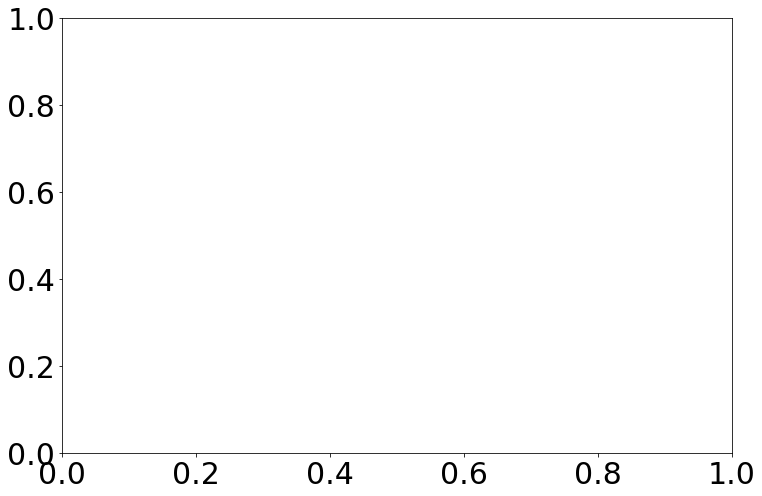

In [27]:
from pymatgen.electronic_structure import plotter as pmgplotter
plotter = pmgplotter.DosPlotter()
elements = ['Ba', 'Ti', 'O']
# plotter.add_dos_dict(cdos.get_spd_dos())
plotter.add_dos_dict(cdos.get_element_spd_dos(el='Ba'))
# plotter.add_dos_dict(cdos.get_element_spd_dos(el='Ti'))
# plotter.add_dos_dict(cdos.get_element_spd_dos(el='O'))
# for ele in elements:
#     data = cabsdos.get_element_spd_dos(el=ele)
#     plotter.add_dos(ele, data)
plotter.show()

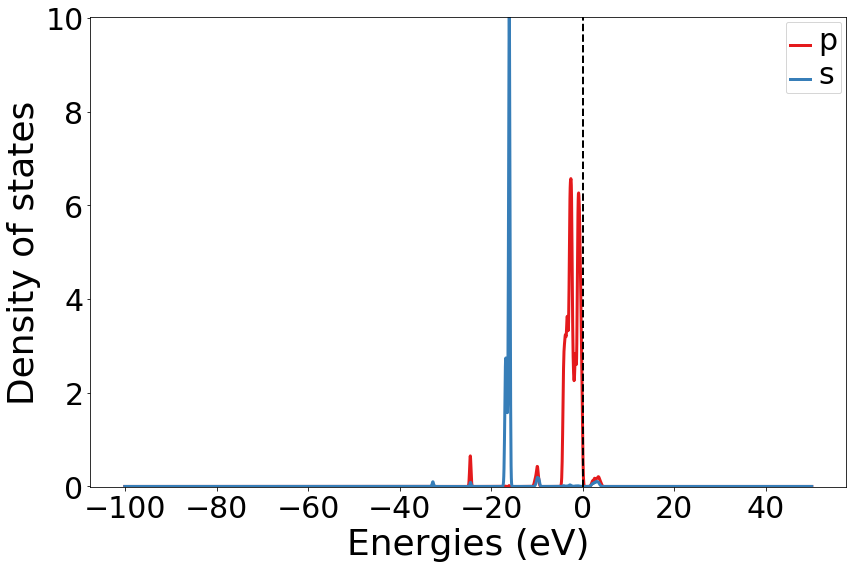